# SNP lung Cancer Data-Set Balanced Missing Value

In this Ipython file we will work with balanced missing values on lung cancer data-set.
That is, if we remember the data-set, there are many missing values under 
the trail, pd1duz, pdl1poly, CD28, cd27snp, CD40 columns for lung and control individuals.
Our goal is balance the missing values of these samples and find the results of this data-set,
and compare with our decimal forms of data. So we will observe what will happens after appying some Imputation.
Notice that before applying imputation we converted our genotypes to decimal forms.

### Importing Modules

In [69]:
import sys
main_path = "../.."
sys.path.append(main_path)

import numpy as np
import pandas as pd
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
from src.scripts.common_figures import Figures
from src.scripts.model_and_evaluation import ModelAndEvaluation
import seaborn as sns
import yaml
import warnings
warnings.simplefilter('ignore')

In [70]:
figures = Figures()
model_and_evaluation = ModelAndEvaluation()

### To get data and convert it to decimal forms

In [71]:
data = pd.read_excel('../../data/raw/lung_cancer.xlsx')
xlsx = pd.ExcelFile('../../data/raw/lung_cancer.xlsx')

df1 = pd.read_excel(xlsx, sheet_name='akciğer')
df2 = pd.read_excel(xlsx, sheet_name='kontrol')

df2 = df2.iloc[:][3:len(df2)]
df2 = df2.iloc[:,5:22]
data = data.iloc[:][3:len(data)]
binary_data = np.where(pd.isna(np.ravel(data.iloc[:,2])), 0, np.ravel(data.iloc[:,2]))

data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
data = data.iloc[:,5:22]


targets = np.ravel(data.iloc[:,0])
targets = np.where(targets == 'kontrol', 0, 1)

data = pd.concat([data, df2])
data = pd.DataFrame(data)

features = np.array(data.iloc[:,2:17])
columns = data.columns[2:17]
targets_control = np.ravel(df2.iloc[:,0])
binary_data_control = [1 for i in range(len(targets_control))]
binary_data = np.concatenate([binary_data, binary_data_control])

targets_control = np.where(targets_control == 'kontrol', 0, 1)
# print(targets)
df_path = f"{main_path}/data/processed/dataframes"

data_live_month = pd.read_csv(f"{df_path}/data_live_month.csv").values.ravel()

features_control = np.array(df2.iloc[:,2:17])
columns_control = df2.columns[2:17]
targets = np.concatenate([targets, targets_control])
binary_data = pd.read_csv(f"{df_path}/binary_data_is_live.csv").values.ravel()



with open(f'{main_path}/config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
decimal_forms = config['decimal']
data_live_month_18 = pd.read_csv(f"{df_path}/data_live_month_18.csv").values.ravel()
data_live_month_36 = pd.read_csv(f"{df_path}/data_live_month_36.csv").values.ravel()
data_live_month_54 = pd.read_csv(f"{df_path}/data_live_month_54.csv").values.ravel()
data_live_month_72 = pd.read_csv(f"{df_path}/data_live_month_72.csv").values.ravel()
data_live_month_90 = pd.read_csv(f"{df_path}/data_live_month_90.csv").values.ravel()
data_live_month_108 = pd.read_csv(f"{df_path}/data_live_month_108.csv").values.ravel()



### A useful function to find and return feature importances

#### To convert data from categorical values to decimal forms

In [72]:
decimal_features = pd.DataFrame(features)
decimal_features.columns = columns
for col in decimal_features.columns:
    print(decimal_features[col].map(decimal_forms))
    decimal_features[col] = decimal_features[col].map(decimal_forms)


0      10.0
1      10.0
2       NaN
3      10.0
4       NaN
       ... 
135     NaN
136     NaN
137     NaN
138    14.0
139    15.0
Name: IDO-1, Length: 140, dtype: float64
0      10.0
1      10.0
2       NaN
3       NaN
4      10.0
       ... 
135     NaN
136     NaN
137     NaN
138    10.0
139     NaN
Name: p16540, Length: 140, dtype: float64
0      10.0
1      10.0
2      10.0
3       NaN
4      10.0
       ... 
135    10.0
136    10.0
137     9.0
138    10.0
139     NaN
Name: p16580, Length: 140, dtype: float64
0      10.0
1      10.0
2       0.0
3       0.0
4       NaN
       ... 
135    10.0
136    10.0
137    10.0
138     8.0
139     8.0
Name: FOXP3, Length: 140, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
135    15.0
136     0.0
137    15.0
138     NaN
139     NaN
Name: ICAM-1, Length: 140, dtype: float64
0       2.0
1      10.0
2       0.0
3       2.0
4       NaN
       ... 
135    10.0
136     0.0
137     2.0
138    10.0
139     2.0


In [73]:
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS
cdt_knn = fast_knn(decimal_features.values, k=30)
cdt_knn = pd.DataFrame(cdt_knn, columns=columns)

cdt_mice = mice(decimal_features.values, random_state=1)
cdt_mice = pd.DataFrame(cdt_mice, columns=columns)

In [74]:
cdt_knn_fi = np.round(cdt_knn).astype('int').astype('str')
cdt_mice_fi = np.round(cdt_mice).astype('int').astype('str')

cdt_knn_fi_ohe = pd.get_dummies(cdt_knn_fi, sparse=True, columns=columns)
cdt_mice_fi_ohe = pd.get_dummies(cdt_mice_fi, sparse=True, columns=columns)

In [75]:
cdt_knn_fi_ohe_features = cdt_knn_fi_ohe.values
cdt_mice_fi_ohe_features = cdt_mice_fi_ohe.values
print(cdt_mice_fi_ohe_features)

[[ True False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]
 ...
 [False False  True ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [76]:
print(targets)
print(binary_data)

metric_results_wknn_is_live = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features, binary_data)
metric_results_wmice_is_live = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features, binary_data)
print("1 completed")
metric_results_wknn = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features, targets)
metric_results_wmice = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features, targets)
print("2 completed")

metric_results_wknn_live_month_18 = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features[0:70], data_live_month_18)
metric_results_wmice_live_month_18 = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features[0:70], data_live_month_18)
print("18 completed")

metric_results_wknn_live_month_36 = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features[0:70], data_live_month_36)
metric_results_wmice_live_month_36 = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features[0:70], data_live_month_36)
print("36 completed")

metric_results_wknn_live_month_54 = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features[0:70], data_live_month_54)
metric_results_wmice_live_month_54 = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features[0:70], data_live_month_54)
print("54 completed")

metric_results_wknn_live_month_72 = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features[0:70], data_live_month_72)
metric_results_wmice_live_month_72 = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features[0:70], data_live_month_72)
print("72 completed")

metric_results_wknn_live_month_90 = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features[0:70], data_live_month_90)
metric_results_wmice_live_month_90 = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features[0:70], data_live_month_90)
print("90 completed")

metric_results_wknn_live_month_108 = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features[0:70], data_live_month_108)
metric_results_wmice_live_month_108 = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features[0:70], data_live_month_108)
print("108 completed")

# metric_results_wknn_is_live = model_and_evaluation.return_metric_results(cdt_knn_fi_ohe_features, binary_data)
# metric_results_wmice_is_live = model_and_evaluation.return_metric_results(cdt_mice_fi_ohe_features, binary_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

2 completed
18 completed
36 completed
54 completed
72 completed
90 completed
108 completed


In [77]:
sns.set_context('poster', font_scale=0.8)

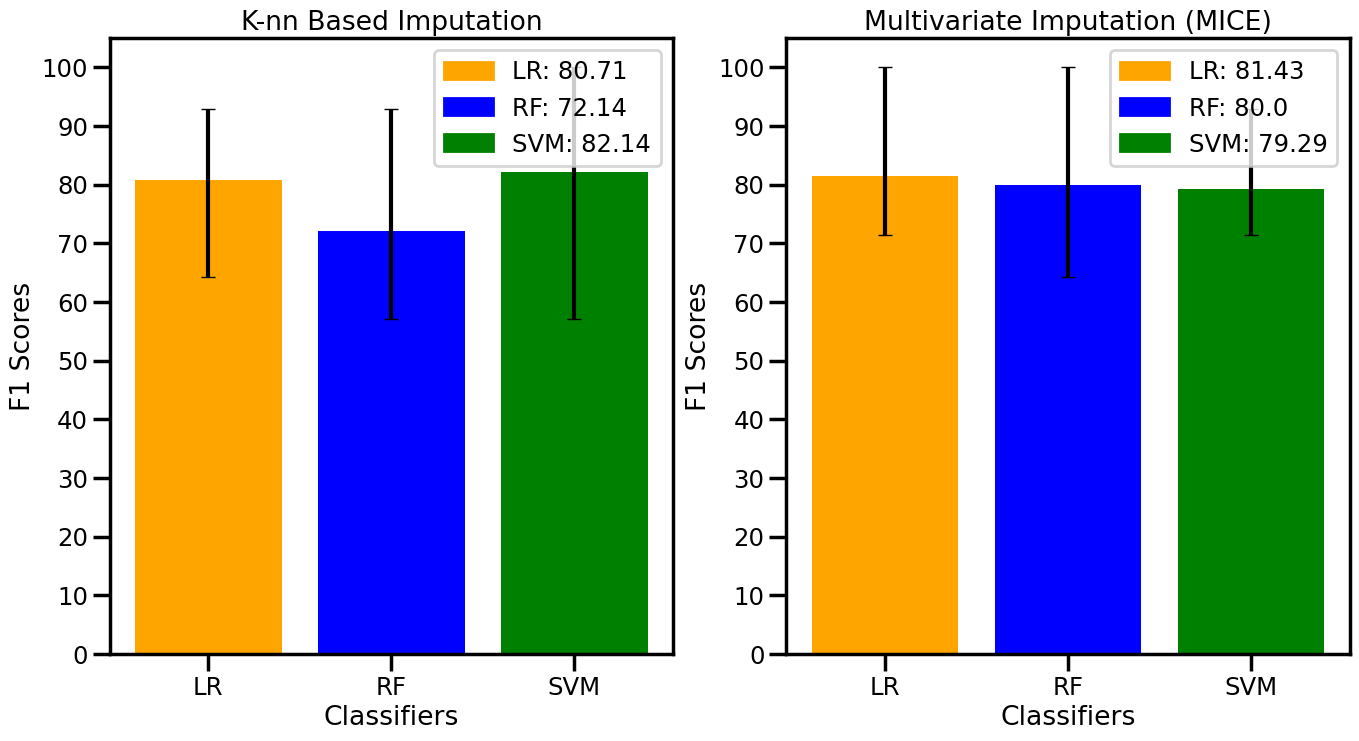

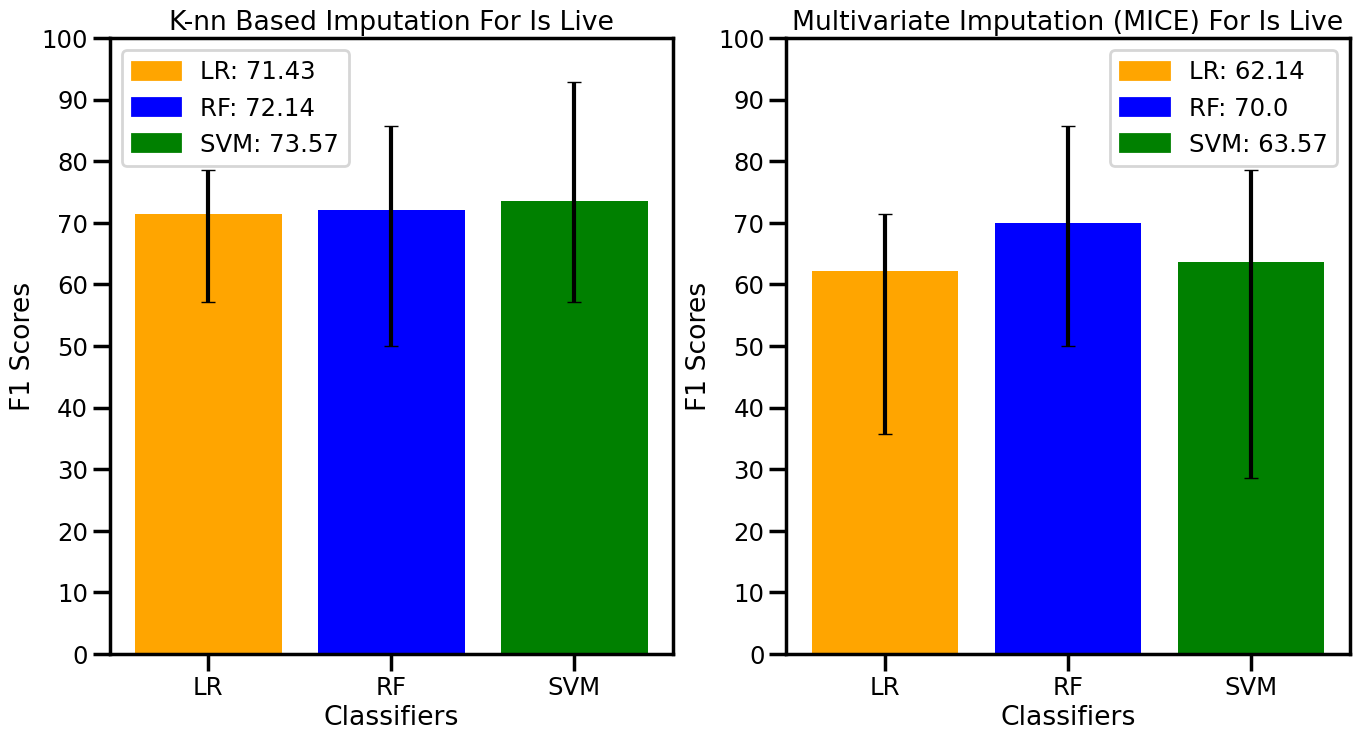

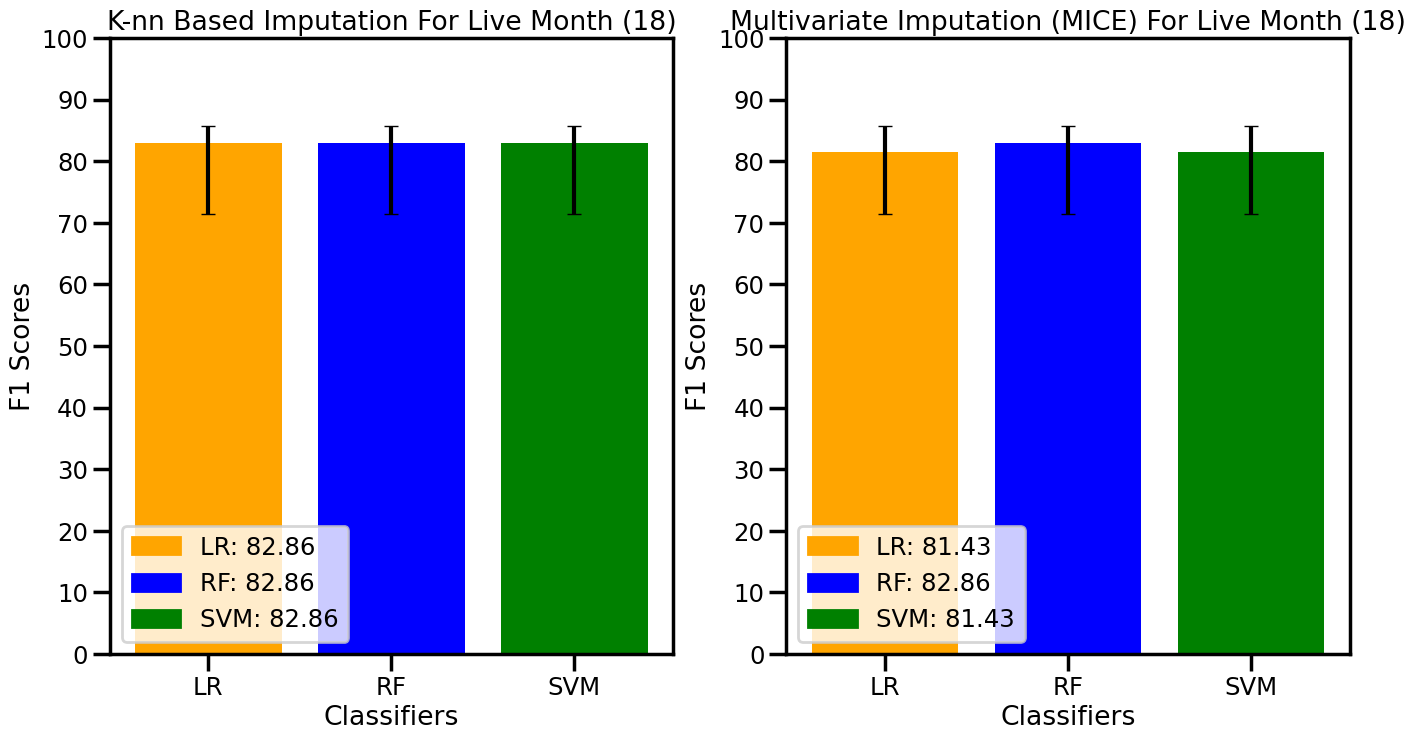

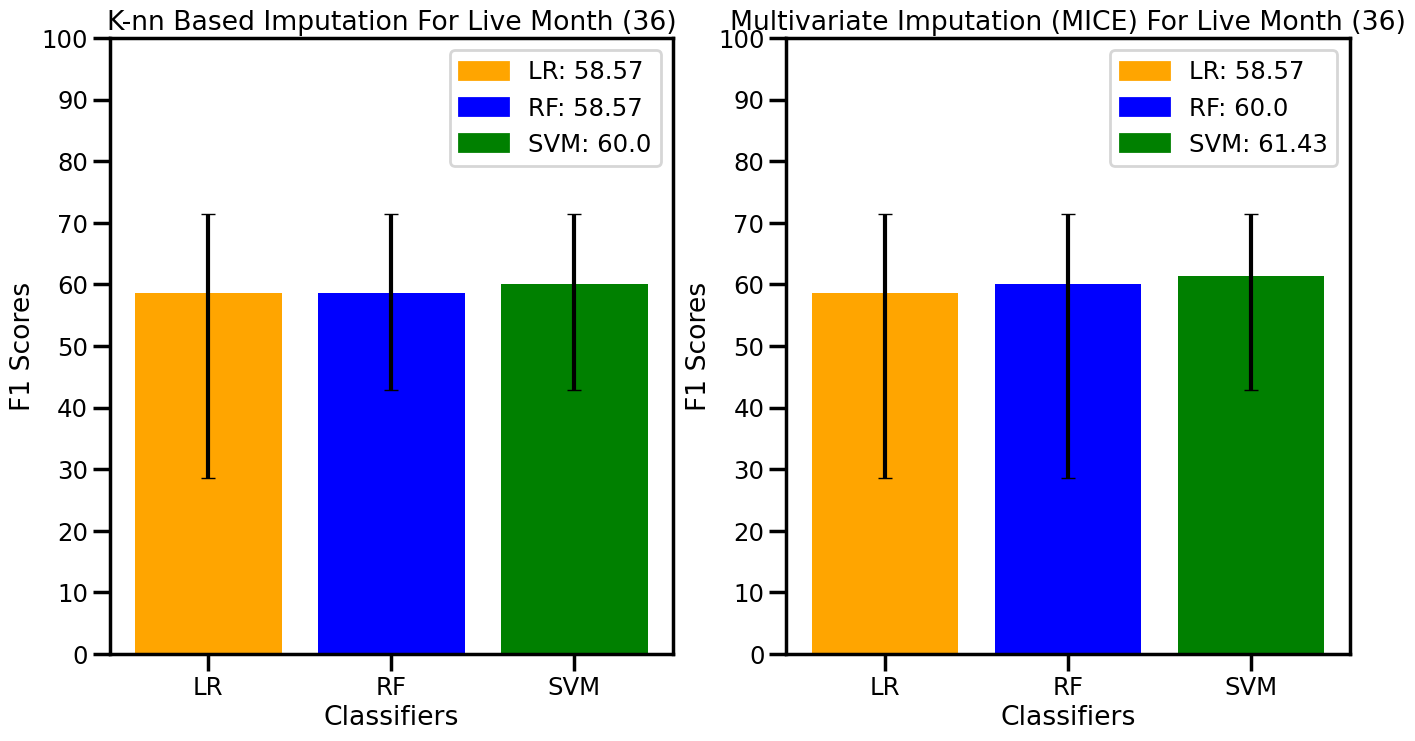

36 completed


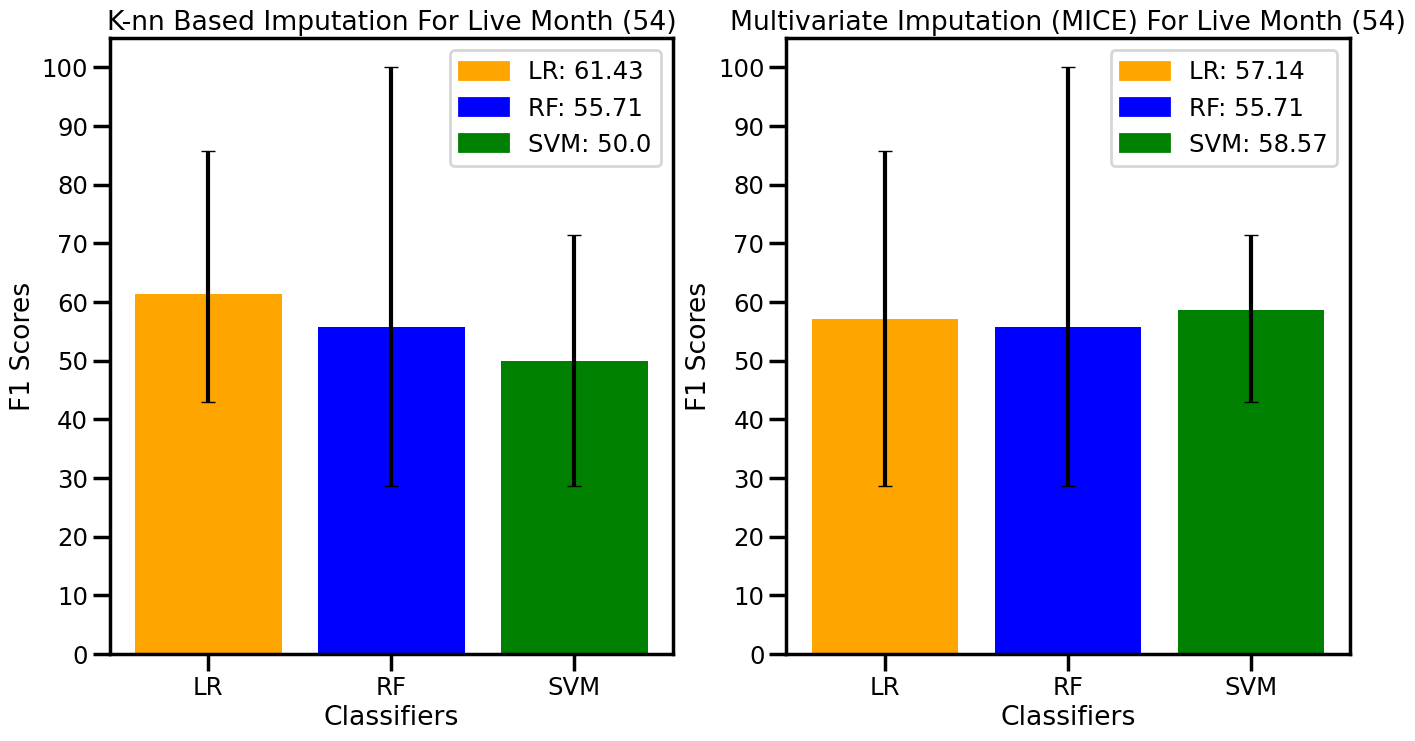

54 completed


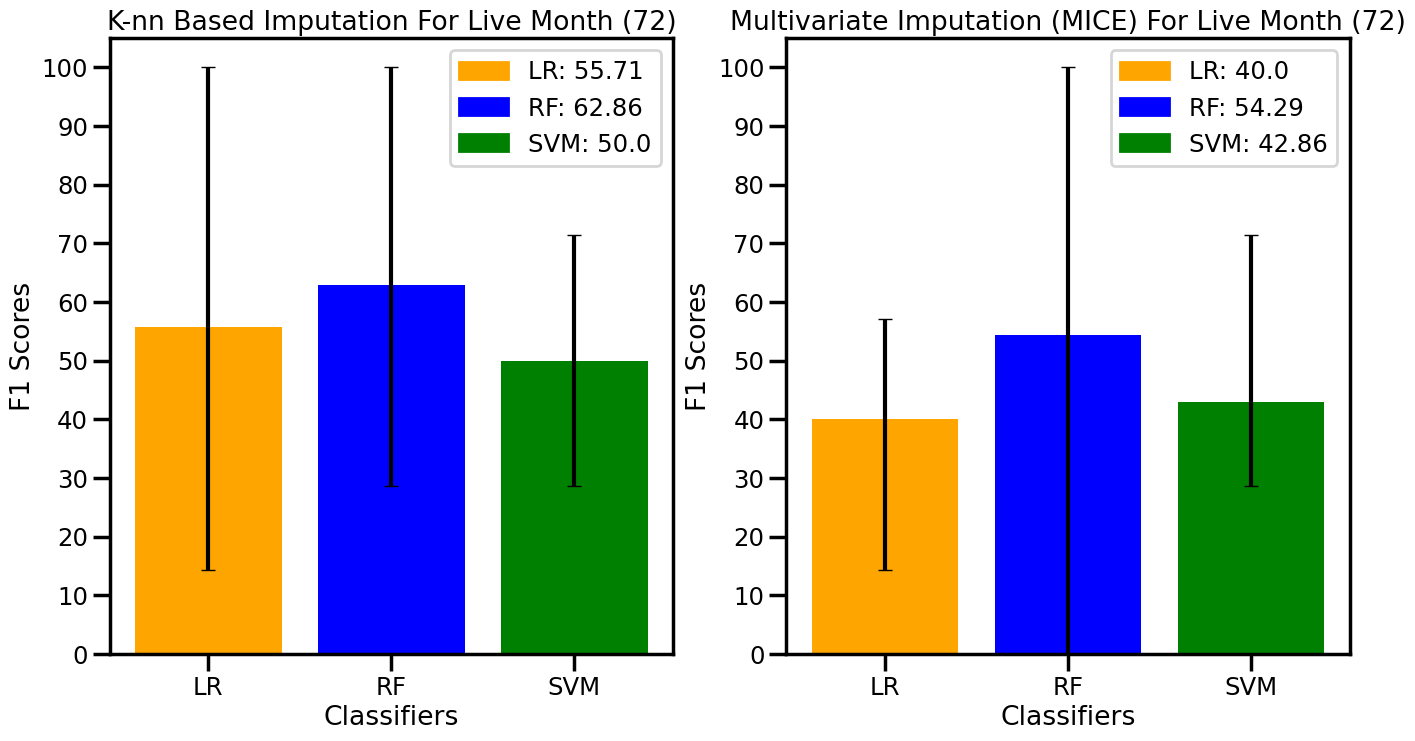

72 completed


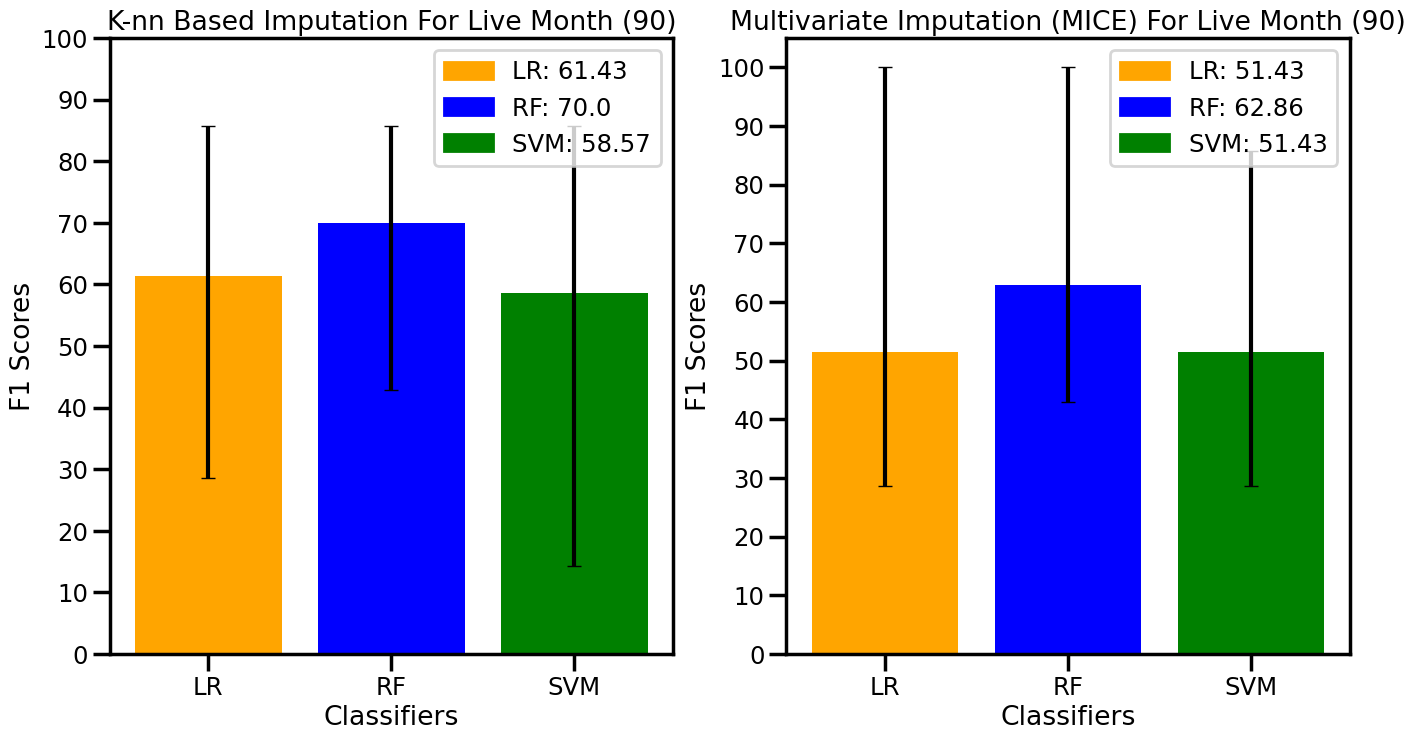

90 completed


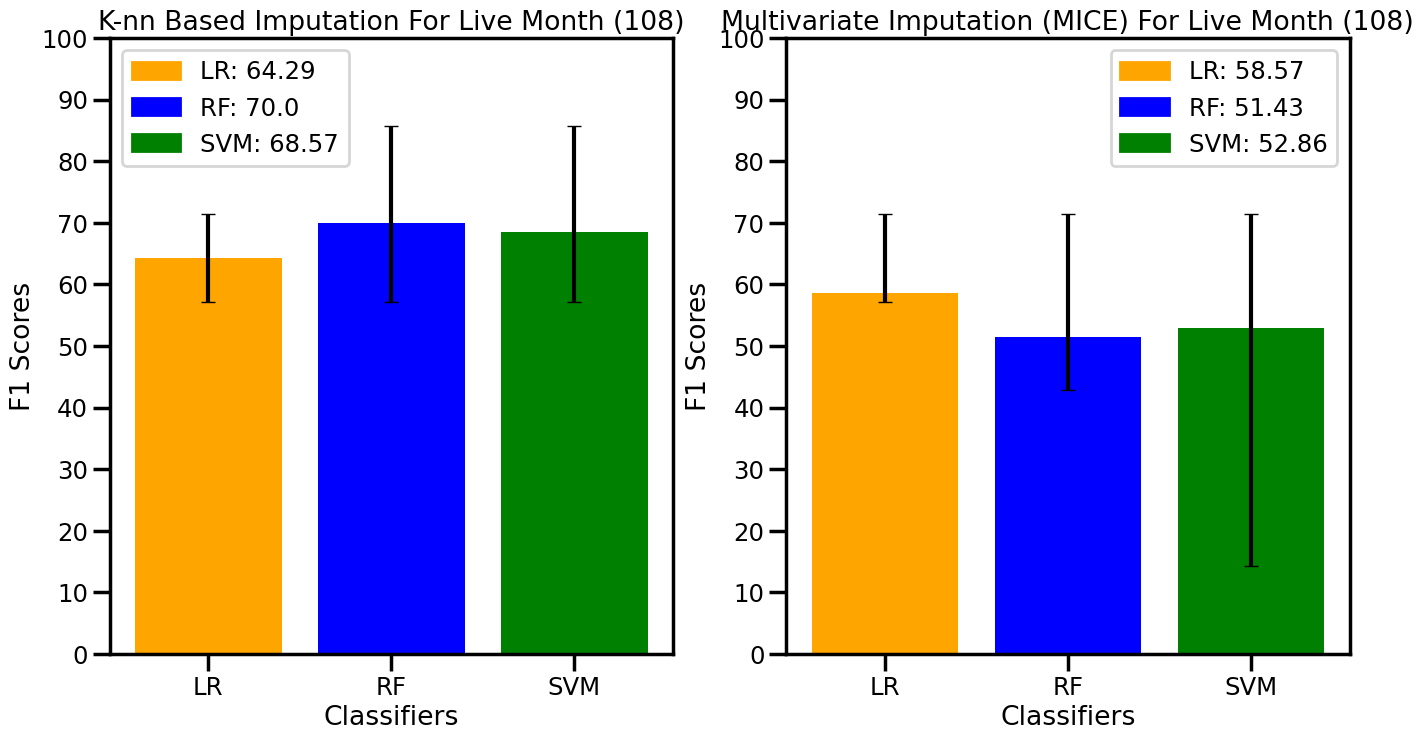

108 completed


In [78]:
class_names = {'wknn': "K-nn Based Imputation",
              'wmice': "Multivariate Imputation (MICE)"}

classifier_names = ["LR", 'RF', 'SVM']

scores = {'wknn': [metric_results_wknn[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice': [metric_results_wmice[i.lower()]['f1_scores'] for i in classifier_names]}

save = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe.svg"
figures.draw_bar_plot(classifier_names, scores, class_names, grid_shape=(1, 2), save=save, paper_figure=paper_figure)



class_names_is_live = {'wknn_is_live': "K-nn Based Imputation For Is Live",
              'wmice_is_live': "Multivariate Imputation (MICE) For Is Live"}


scores_is_live = {'wknn_is_live': [metric_results_wknn_is_live[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_is_live': [metric_results_wmice_is_live[i.lower()]['f1_scores'] for i in classifier_names]}

save_is_live = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_is_live.png"
paper_figure_is_live = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_is_live.svg"
figures.draw_bar_plot(classifier_names, scores_is_live, class_names_is_live, grid_shape=(1, 2), save=save_is_live, paper_figure=paper_figure_is_live)


class_names_live_month_18 = {'wknn_live_month_18': "K-nn Based Imputation For Live Month (18)",
              'wmice_live_month_18': "Multivariate Imputation (MICE) For Live Month (18)"}


scores_live_month_18 = {'wknn_live_month_18': [metric_results_wknn_live_month_18[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_live_month_18': [metric_results_wmice_live_month_18[i.lower()]['f1_scores'] for i in classifier_names]}

save_live_month_18 = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_18.png"
paper_figure_live_month_18 = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_18.svg"
figures.draw_bar_plot(classifier_names, scores_live_month_18, class_names_live_month_18, grid_shape=(1, 2), save=save_live_month_18, paper_figure=paper_figure_live_month_18)



class_names_live_month_36 = {'wknn_live_month_36': "K-nn Based Imputation For Live Month (36)",
              'wmice_live_month_36': "Multivariate Imputation (MICE) For Live Month (36)"}

scores_live_month_36 = {'wknn_live_month_36': [metric_results_wknn_live_month_36[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_live_month_36': [metric_results_wmice_live_month_36[i.lower()]['f1_scores'] for i in classifier_names]}

save_live_month_36 = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_36.png"
paper_figure_live_month_36 = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_36.svg"
figures.draw_bar_plot(classifier_names, scores_live_month_36, class_names_live_month_36, grid_shape=(1, 2), save=save_live_month_36, paper_figure=paper_figure_live_month_36)
print("36 completed")

class_names_live_month_54 = {'wknn_live_month_54': "K-nn Based Imputation For Live Month (54)",
              'wmice_live_month_54': "Multivariate Imputation (MICE) For Live Month (54)"}

scores_live_month_54 = {'wknn_live_month_54': [metric_results_wknn_live_month_54[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_live_month_54': [metric_results_wmice_live_month_54[i.lower()]['f1_scores'] for i in classifier_names]}

save_live_month_54 = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_54.png"
paper_figure_live_month_54 = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_54.svg"
figures.draw_bar_plot(classifier_names, scores_live_month_54, class_names_live_month_54, grid_shape=(1, 2), save=save_live_month_54, paper_figure=paper_figure_live_month_54)
print("54 completed")

class_names_live_month_72 = {'wknn_live_month_72': "K-nn Based Imputation For Live Month (72)",
              'wmice_live_month_72': "Multivariate Imputation (MICE) For Live Month (72)"}

scores_live_month_72 = {'wknn_live_month_72': [metric_results_wknn_live_month_72[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_live_month_72': [metric_results_wmice_live_month_72[i.lower()]['f1_scores'] for i in classifier_names]}

save_live_month_72 = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_72.png"
paper_figure_live_month_72 = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_72.svg"
figures.draw_bar_plot(classifier_names, scores_live_month_72, class_names_live_month_72, grid_shape=(1, 2), save=save_live_month_72, paper_figure=paper_figure_live_month_72)
print("72 completed")
class_names_live_month_90 = {'wknn_live_month_90': "K-nn Based Imputation For Live Month (90)",
              'wmice_live_month_90': "Multivariate Imputation (MICE) For Live Month (90)"}

scores_live_month_90 = {'wknn_live_month_90': [metric_results_wknn_live_month_90[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_live_month_90': [metric_results_wmice_live_month_90[i.lower()]['f1_scores'] for i in classifier_names]}

save_live_month_90 = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_90.png"
paper_figure_live_month_90 = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_90.svg"
figures.draw_bar_plot(classifier_names, scores_live_month_90, class_names_live_month_90, grid_shape=(1, 2), save=save_live_month_90, paper_figure=paper_figure_live_month_90)
print("90 completed")

class_names_live_month_108 = {'wknn_live_month_108': "K-nn Based Imputation For Live Month (108)",
              'wmice_live_month_108': "Multivariate Imputation (MICE) For Live Month (108)"}

scores_live_month_108 = {'wknn_live_month_108': [metric_results_wknn_live_month_108[i.lower()]['f1_scores'] for i in classifier_names],
          'wmice_live_month_108': [metric_results_wmice_live_month_108[i.lower()]['f1_scores'] for i in classifier_names]}

save_live_month_108 = f"{main_path}/figures/paper_figures/png/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_108.png"
paper_figure_live_month_108 = f"{main_path}/figures/paper_figures/svg/f1_scores_imp_dec_forms_cdt_di_fi_ohe_live_month_108.svg"
figures.draw_bar_plot(classifier_names, scores_live_month_108, class_names_live_month_108, grid_shape=(1, 2), save=save_live_month_108, paper_figure=paper_figure_live_month_108)
print("108 completed")

